In [11]:
import numpy as np
import gridworld
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

def create_gridworld(world_size):
    """
    world_size: height and width of the squared-shape gridworld
    return
        actions: list of str, possible actions
        states: list of coordinate tuples representing all non-terminal states
        nextState: list of list of dict, index 3 times to return the next state coordinate tuple
    """

    # left, up, right, down
    actions = ['L', 'U', 'R', 'D']

    # Next
    nextState = []
    for i in range(0, WORLD_SIZE):
        nextState.append([])
        for j in range(0, WORLD_SIZE):
            # Creates a dictionnary that
            next = dict()
            if i == 0:
                next['U'] = (i, j)
            else:
                next['U'] = (i - 1, j)

            if i == WORLD_SIZE - 1:
                next['D'] = (i, j)
            else:
                next['D'] = (i + 1, j)

            if j == 0:
                next['L'] = (i, j)
            else:
                next['L'] = (i, j - 1)

            if j == WORLD_SIZE - 1:
                next['R'] = (i, j)
            else:
                next['R'] = (i, j + 1)

            nextState[i].append(next)

    states = []
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            if (i == 0 and j == 0) or (i == WORLD_SIZE - 1 and j == WORLD_SIZE - 1):
                continue
            else:
                states.append((i, j))
                
    return actions, states, nextState

In [13]:
WORLD_SIZE = 4
REWARD = -1.0
ACTION_PROB = 0.25
EPSILON = 1e-4

# Initializes the gridworld, our value function estimate and iteration index k
actions, states, nextState = create_gridworld(WORLD_SIZE)
V_k = np.zeros((WORLD_SIZE, WORLD_SIZE))
k = 0
sum_of_diffs = EPSILON + 1 # arbitrary initialization just to get into the while loop

# Policy evaluation iterates util the value function converges
while sum_of_diffs > EPSILON:
    
    # Initialize our new estimation of the value function
    V_kplus1 = np.zeros((WORLD_SIZE, WORLD_SIZE))
    
    for i, j in states:
        for action in actions:
            newPosition = nextState[i][j][action]
            
            # Bellman update rule
            V_kplus1[i, j] += ACTION_PROB * (REWARD + V_k[newPosition[0], newPosition[1]])
    
    # Computes the sum of differences between last and new estimates
    sum_of_diffs = np.sum(np.abs(V_kplus1 - V_k))
    
    # Updates our current estimate
    V_k = V_kplus1
    k += 1
    
print('Random Policy (converged in {} iterations)'.format(k))
print(V_k)

Random Policy (converged in 218 iterations)
[[  0.         -13.99990931 -19.99986561 -21.99984961]
 [-13.99990931 -17.99988161 -19.99986651 -19.99986561]
 [-19.99986561 -19.99986651 -17.99988161 -13.99990931]
 [-21.99984961 -19.99986561 -13.99990931   0.        ]]


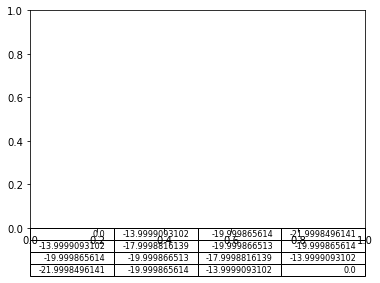

In [18]:
plt.figure()
plt.table(cellText=V_k)
plt.show()